# Nesse notebook iremos realizar a análise os dados de música do Spotify
## Os dados foram baixados do Kaggle
Inicialmente faremos uma análise exploratória dos dados para tentar identificar padrões e/ou alguma hipótese interessante

In [1]:
#importar as bibliotecas
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#O arquivo .csv foi hosperado no GitHub
fonte = ('https://raw.githubusercontent.com/brenocolaco/Analise-do-Spotify/main/dataset.csv')
dados = pd.read_csv(fonte)

In [3]:
#para ver todas as colunas
pd.set_option('display.max_columns', None)
#Observar as primeiras 10 linhas para ter uma ideia dos dados
dados.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [4]:
#ver o tamanho do dataset
dados.shape

(114000, 21)

In [5]:
#ver o nome das colunas
dados.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

### Num primeiro momento vemos que temos uma boa quantidade dados (11400 ocorrências). Porém ao análisar as colunas, algumas delas nos não temos ideia de qual o seu significado (ex: 'explicit', 'danceability', 'energy', 'key')

Com isso, vamos no kaggle onde baixamos o csv e vamos pegar a descrição das colunas (o nosso dificionário)

### Column Description
* **track_id**: The Spotify ID for the track;

* **artists**: The artists' names who performed the track. If there is more than one artist, they are separated by a (;);

* **album_name**: The album name in which the track appears;

* **track_name**: Name of the track;

* **popularity**: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity;

* **duration_ms**: The track length in milliseconds;

* **explicit**: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown);

* **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable;

* **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale;

* **key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1;

* **loudness**: The overall loudness of a track in decibels (dB);

* **mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0;

* **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks;

* **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic;

* **instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content;

* **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live;

* **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry);

* **tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration;

* **time_signature**: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.;

* **track_genre**: The genre in which the track belongs.

In [6]:
#para obter um resumo e ver a ocorrência de dados nulos
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

**Pelo .info observamos que temos um unico elemento com dados nulos. É uma música que não apresenta nome da música, do artista e do album**

In [7]:
#criando a selecao pela coluna artists
selecao = dados['artists'].isnull()
dados[selecao]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


__Uma coisa que chama a atenção é que a duração dessa faixa é 0. Consideramos que não pode haver uma música com duração de 0 segundos.__

In [8]:
#verificar se há alguma outra musica com duração de 0 ms
dados.query('duration_ms == 0')

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


__O interessante é que existe valores nos outros parâmetros, mas somente ela apresenta duração de 0 ms em todo o dataframe. Embora os outros parâmetros apresentem valores o que causa certa curiosidade, iremos retirar essa linha do nosso dataframe.__

In [9]:
#o parametro inplace True é passado para modificar o dataframe na origem
dados.dropna(inplace=True)
dados.shape

(113999, 21)

__Agora que tratamos dos dados nulos, vamos fazer uma análise dos generos de musicas q temos no nosso dataframe__

In [10]:
#Observar quais são os estilos de musica que temos no nosso dataset
dados['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [11]:
#Ver quantos generos musicais temos... 
len(dados['track_genre'].unique())

114

__(Não imaginava que existia tantos gêneros musicais)__

In [12]:
#Ver a ocorrência de cada gênero no dataframe
dados['track_genre'].value_counts()

acoustic             1000
afrobeat             1000
psych-rock           1000
progressive-house    1000
power-pop            1000
                     ... 
emo                  1000
electronic           1000
electro              1000
world-music          1000
k-pop                 999
Name: track_genre, Length: 114, dtype: int64

#### Foi feita uma amostra de 1000 músicas para cada estilo. Como retiramos uma que era relacionada ao k-pop temos 999 nesse estilo

In [13]:
#fazendo algumas seleções no dataframe
genero_duracao = dados[['track_genre', 'duration_ms']]
genero_popularidade = dados[['track_genre', 'popularity']]

In [14]:
media_duracao_por_genero = genero_duracao.groupby('track_genre').mean().sort_values(by=['duration_ms'], ascending = False)

In [15]:
media_popularidade_por_genero = genero_popularidade.groupby('track_genre').mean().sort_values(by=['popularity'], ascending = False)

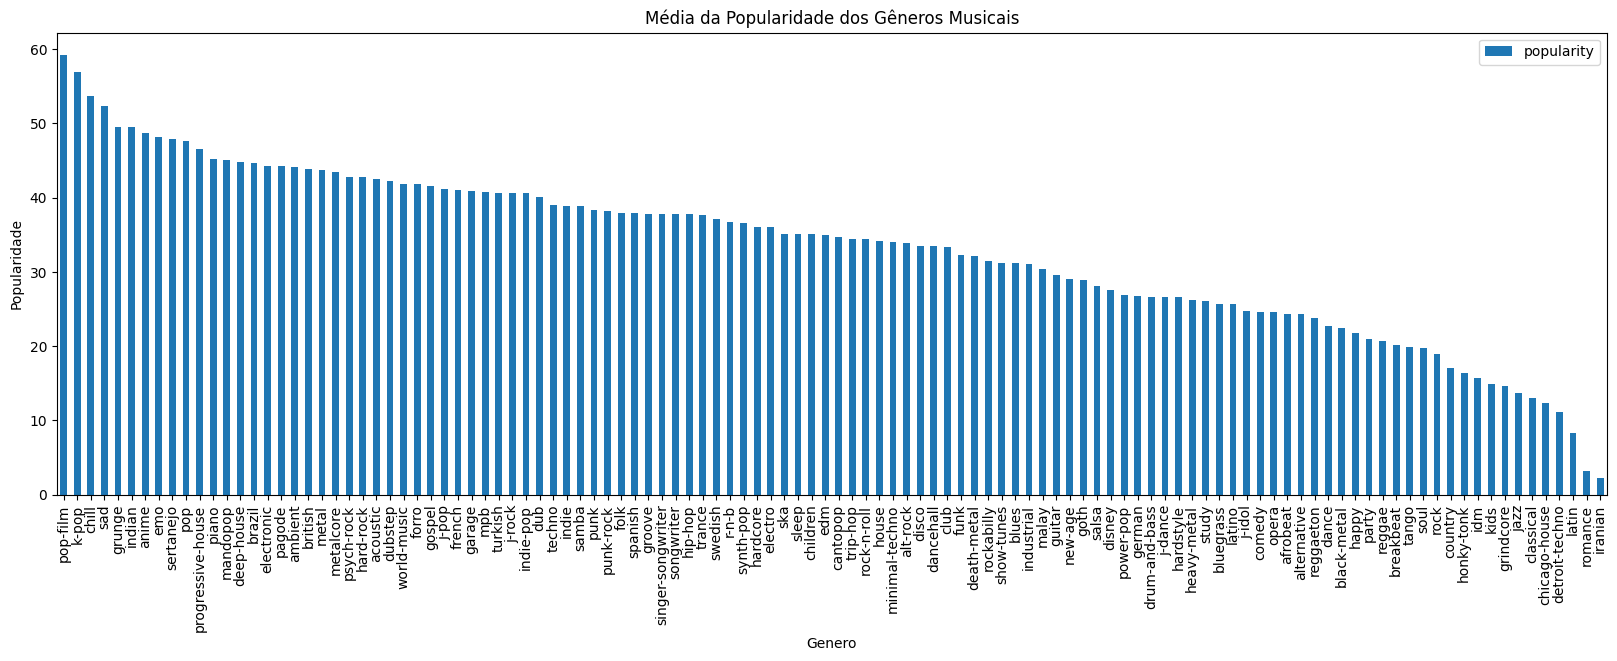

In [16]:
media_popularidade_por_genero.plot.bar(figsize=(20,6))
plt.xlabel("Genero")
plt.ylabel("Popularidade")
plt.title("Média da Popularidade dos Gêneros Musicais")
plt.show()

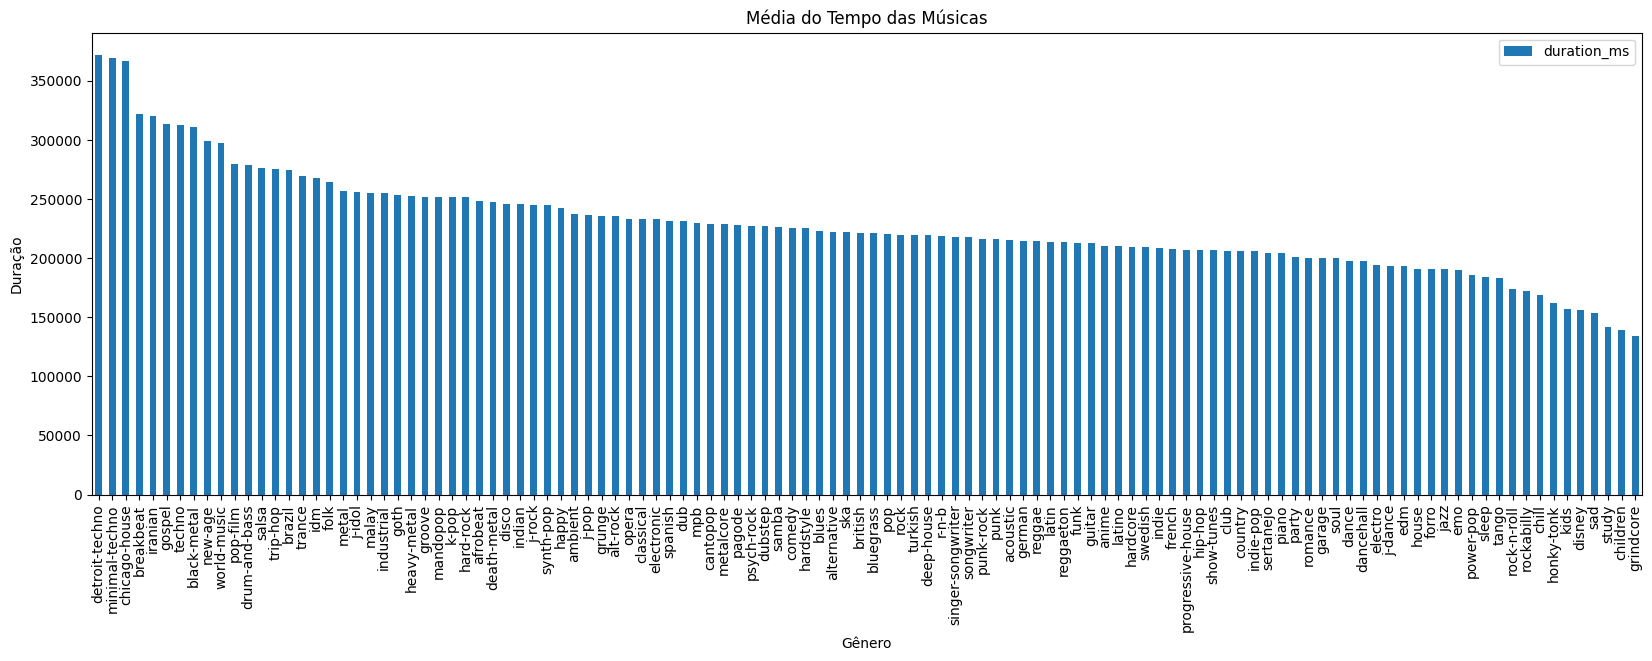

In [17]:
media_duracao_por_genero.plot.bar(figsize=(20,6))
plt.xlabel("Gênero")
plt.ylabel("Duração")
plt.title("Média do Tempo das Músicas")
plt.show()

#### Embora os gráficos apresentem muitas informações valiosas existe uma grande quantidade de estilos para ser analisados individualmente. Com isso, podemos, então, fazer algumas análises pelos extremos dos gráficos inicialmente

In [18]:
dados.query('popularity > 95')['track_genre'].unique()

array(['dance', 'edm', 'hip-hop', 'latin', 'latino', 'piano', 'pop',
       'reggae', 'reggaeton', 'rock'], dtype=object)

##### Vemos assim que os generos mais populares são dance, edm, hip-hop, latino, piano, pop, reggae, reggaeton, rock

In [19]:
#pegar os 100 maiores valores pela popularidade
dados.nlargest(100, ['popularity'])

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,dance
81051,81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,pop
51664,51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop
20008,20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,dance
30003,30003,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,edm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91009,91009,75FEaRjZTKLhTrFGsfMUXR,Kate Bush,Hounds Of Love,Running Up That Hill (A Deal With God),90,298933,False,0.629,0.547,10,-13.123,0,0.0550,0.72000,0.003140,0.0604,0.197,108.375,4,rock
99013,99013,75FEaRjZTKLhTrFGsfMUXR,Kate Bush,Hounds Of Love,Running Up That Hill (A Deal With God),90,298933,False,0.629,0.547,10,-13.123,0,0.0550,0.72000,0.003140,0.0604,0.197,108.375,4,singer-songwriter
102018,102018,75FEaRjZTKLhTrFGsfMUXR,Kate Bush,Hounds Of Love,Running Up That Hill (A Deal With God),90,298933,False,0.629,0.547,10,-13.123,0,0.0550,0.72000,0.003140,0.0604,0.197,108.375,4,songwriter
19350,19350,3WMj8moIAXJhHsyLaqIIHI,Zach Bryan,Something in the Orange,Something in the Orange,89,228013,False,0.369,0.192,4,-12.151,0,0.0400,0.55500,0.000008,0.0954,0.148,175.212,3,country


In [20]:
#criar uma variavel para esses 100 maiores valores
cem_mais_populares = dados.nlargest(100, ['popularity'])

In [22]:
#verificar quais são os artistas e o nome dos albuns e usar o drop_duplicate para tirar valores duplicados
#que neste caso seriam de faixas contidas no próprio album
cem_mais_populares[['artists', 'album_name']].drop_duplicates()

,artists,album_name
20001,Sam Smith;Kim Petras,Unholy (feat. Kim Petras)
51664,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52"
20008,David Guetta;Bebe Rexha,I'm Good (Blue)
67356,Manuel Turizo,La Bachata
67358,Bad Bunny;Chencho Corleone,Un Verano Sin Ti
67359,Bad Bunny,Un Verano Sin Ti
20000,Chris Brown,Indigo (Extended)
79000,OneRepublic,I Ain’t Worried (Music From The Motion Picture...
67500,Bad Bunny;Bomba Estéreo,Un Verano Sin Ti
81052,Harry Styles,As It Was
